In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import glob

In [8]:
files = glob.glob('D:\MyData\GreyAtom\Python\Jupyter\weather_data\data\data\weather_data\weather_data_set_*')
print files #this will give a list of files in a directory

['D:\\MyData\\GreyAtom\\Python\\Jupyter\\weather_data\\data\\data\\weather_data\\weather_data_set_1900', 'D:\\MyData\\GreyAtom\\Python\\Jupyter\\weather_data\\data\\data\\weather_data\\weather_data_set_1901']


In [4]:
path = 'D:\MyData\GreyAtom\Python\Jupyter\weather_data\data\data\weather_data\weather_data_set_1900'
d = pd.read_table(path, delimiter='|', header=None, names=['station','year','datemonth','hourminute','temperature'])
d

,station,year,datemonth,hourminute,temperature
0,3300,1900,101,300,23
1,3300,1900,101,400,24
2,3300,1900,301,200,26
3,3300,1900,305,230,24
4,3300,1900,312,100,30
5,3300,1900,412,300,29
6,3301,1900,312,100,34
7,3301,1900,412,400,23


In [13]:
#or we could use globe method in pd concatination two create a merged dataset of two files unde the same directory
#the end result is a merged dataset of 1900 and 1901
#we use the for loop at end to define files data
#for simplification, we defined column names seperately.
column_names = ['station','year','datemonth','hourminute','temperature']
d = pd.concat([pd.read_table(file, delimiter='|', header=None, names=column_names) for file in files], ignore_index=True)
#if we do not define ignore index, the index will be 0-n for 1st data n 0-n in another data.
#It will not be continuous
d

,station,year,datemonth,hourminute,temperature
0,3300,1900,101,300,23.0
1,3300,1900,101,400,24.0
2,3300,1900,301,200,26.0
3,3300,1900,305,230,24.0
4,3300,1900,312,100,30.0
5,3300,1900,412,300,29.0
6,3301,1900,312,100,34.0
7,3301,1900,412,400,23.0
8,3300,1901,101,400,24.0
9,3300,1901,101,500,45.0


In [15]:
#there are NaN entries in data. We will now drop NaN
c_d = d.dropna()
c_d

,station,year,datemonth,hourminute,temperature
0,3300,1900,101,300,23.0
1,3300,1900,101,400,24.0
2,3300,1900,301,200,26.0
3,3300,1900,305,230,24.0
4,3300,1900,312,100,30.0
5,3300,1900,412,300,29.0
6,3301,1900,312,100,34.0
7,3301,1900,412,400,23.0
8,3300,1901,101,400,24.0
9,3300,1901,101,500,45.0


In [23]:
#groupby method will group the dataframe by year as we have defined. It groups the same entries.
#regular max() on data would give us max temp across the data.
#we need max temp on yearly basis
g_d = c_d.groupby('year')
type(g_d)

pandas.core.groupby.DataFrameGroupBy

In [21]:
max_yearly = g_d['temperature'].max()
print type(max_yearly)
print max_yearly

<class 'pandas.core.series.Series'>
year
1900    34.0
1901    45.0
Name: temperature, dtype: float64


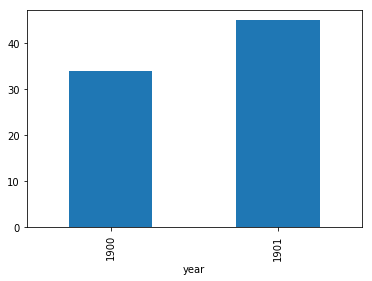

In [22]:
max_yearly.plot(kind='bar')
plt.show()

In [26]:
#pivot table grouping. write aggregator column first on which we want the func to be done.
#then come the aggfunc which defines which method we want to perform on the aggregator
#the, index, which define on which coulumns we want the grouping
#note that the index can be a list. 
p_c_d = c_d.pivot_table('temperature', aggfunc=np.max, index='year')
p_c_d

,temperature
year,
1900,34.0
1901,45.0


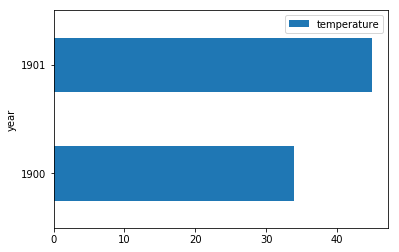

In [30]:
p_c_d.plot(kind='barh')
plt.show()
plt.savefig('max.jpg')

In [37]:
#assume we have a new file now, with just year and temp. 
file2 = 'D:\MyData\GreyAtom\Python\Jupyter\pract_data\data\data\weather_data_company_xyz\weather_data_set'
d2 = pd.read_csv(file2, header=None, names=['year','temperature'])
d2

,year,temperature
0,1900,25.0
1,1900,24.0
2,1900,21.0
3,1900,29.0
4,1901,NaN
5,1901,23.0
6,1901,21.0
7,1900,36.0
8,1901,25.0


In [38]:
c_d2 = d2.dropna()
c_d2

,year,temperature
0,1900,25.0
1,1900,24.0
2,1900,21.0
3,1900,29.0
5,1901,23.0
6,1901,21.0
7,1900,36.0
8,1901,25.0


In [42]:
c_d1 = c_d[['year','temperature']]#we create a new data c_d1 for year and temp to match with c_d2 for concatination
c_d1

,year,temperature
0,1900,23.0
1,1900,24.0
2,1900,26.0
3,1900,24.0
4,1900,30.0
5,1900,29.0
6,1900,34.0
7,1900,23.0
8,1901,24.0
9,1901,45.0


In [41]:
data = pd.concat([c_d1, c_d2], ignore_index=True)
data

,year,temperature
0,1900,23.0
1,1900,24.0
2,1900,26.0
3,1900,24.0
4,1900,30.0
5,1900,29.0
6,1900,34.0
7,1900,23.0
8,1901,24.0
9,1901,45.0


In [43]:
min_temp = data.pivot_table('temperature', aggfunc=np.min, index='year')
min_temp

,temperature
year,
1900,21.0
1901,19.0


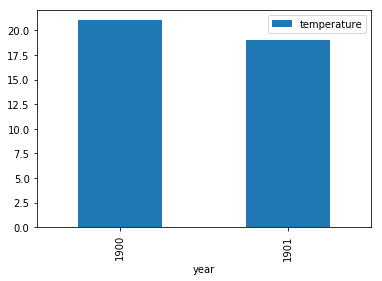

In [45]:
min_temp.plot(kind='bar')
plt.show()